In [71]:

import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sqlalchemy import create_engine
import os
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pydot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set()

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D

In [84]:
df=pd.read_csv('../csv/superstore_dataset2011-2015.csv',encoding= 'unicode_escape')

In [85]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


## Data Cleaning

In [86]:
df['Sub-Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [87]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [88]:
df.shape

(51290, 24)

In [89]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [93]:
df.Region.value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [94]:
df.drop(['Row ID', 'Postal Code', 'Ship Date', 'State'],axis=1, inplace=True)

In [95]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [96]:
df.head()

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,City,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,AG-2011-2040,1/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,IN-2011-47883,1/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,HU-2011-1220,1/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,IT-2011-3647632,1/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,IN-2011-47883,1/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


## Data Wrangling each feature

In [81]:
from datetime import datetime as date
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [98]:
df.drop(['Order ID', 'Region', 'Order Priority'],axis=1, inplace=True)

In [99]:
df.columns

Index(['Order Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'Country', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')

In [100]:
df.columns=['Date', 'Ship_Mode','Customer_ID', 'Customer_Name','Segment','City', 'Country', 'Market', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales','Quantity','Discount','Profit','Shipping Cost']

In [101]:
df.head()

,Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,Country,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,1/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46
1,1/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72
2,1/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17
3,1/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Sweden,EU,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82
4,1/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70


In [102]:
df.Ship_Mode.unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [103]:
df.drop(['Ship_Mode'],axis=1, inplace=True)

In [105]:
df.head()

,Date,Customer_ID,Customer_Name,Segment,City,Country,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,1/1/2011,TB-11280,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46
1,1/1/2011,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72
2,1/1/2011,AT-735,Annie Thurman,Consumer,Budapest,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17
3,1/1/2011,EM-14140,Eugene Moren,Home Office,Stockholm,Sweden,EU,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82
4,1/1/2011,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70


In [106]:
df.shape

(51290, 16)

In [107]:
df.groupby('Customer_ID').agg({'Sales':'sum'}).shape

(1590, 1)

In [108]:
df.Segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [109]:
df.Customer_ID.value_counts()

PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
EM-13960    85
MY-18295    85
MP-17965    84
ZC-21910    84
CK-12205    83
AF-10870    81
BW-11110    81
GH-14425    80
EM-14140    79
TP-21130    79
WB-21850    79
HM-14860    79
BF-11170    78
SC-20380    77
AB-10015    77
HG-14845    77
KH-16690    76
JK-16090    75
KA-16525    75
TS-21610    75
MF-18250    75
SE-20110    75
MA-17560    74
SD-20485    74
GT-14710    74
JE-15715    74
            ..
TM-11010     4
CT-1995      3
BD-1500      3
FH-4350      3
DK-3090      3
LH-6900      3
MP-7470      3
RB-9645      3
EA-4035      3
SC-10800     3
TT-11070     3
SC-10575     3
TN-11040     3
KD-6615      3
NC-8625      3
MF-7665      3
SJ-10500     3
RW-9630      3
KM-6225      3
MG-7875      2
KD-6270      2
KB-6585      2
DB-3405      2
MG-7650      1
ZC-11910     1
RC-9825      1
DK-2985      1
MG-7890      1
ME-8010      1
BG-1035      1
Name: Customer_ID, Length: 1590, dtype: int64

In [110]:
df.Product_ID.value_counts()

OFF-AR-10003651     35
OFF-AR-10003829     31
OFF-BI-10003708     30
OFF-BI-10002799     30
FUR-CH-10003354     28
OFF-BI-10002570     27
OFF-BI-10004140     25
OFF-BI-10003650     24
OFF-BI-10001808     24
OFF-BI-10004632     24
OFF-BI-10004195     24
OFF-BIN-10002061    23
OFF-BI-10000542     23
OFF-AR-10000091     23
OFF-BI-10001249     22
OFF-BI-10004654     22
OFF-AR-10004825     22
OFF-AR-10000110     22
OFF-STA-10001791    22
OFF-STA-10001747    21
OFF-AR-10001228     20
OFF-AR-10000594     20
OFF-FEL-10001865    20
OFF-AR-10004519     20
OFF-AR-10001418     20
OFF-AR-10000799     20
OFF-AR-10001777     20
OFF-AR-10001529     20
OFF-BI-10000179     20
OFF-AR-10002805     20
                    ..
FUR-BUS-10003724     1
TEC-PH-10001289      1
FUR-TA-10004832      1
OFF-FA-10000122      1
OFF-AR-10001645      1
OFF-PA-10002918      1
FUR-TA-10002699      1
OFF-ST-10003393      1
TEC-MA-10002898      1
FUR-OFF-10003019     1
OFF-AP-10000195      1
OFF-BI-10000707      1
OFF-FA-1000

In [111]:
df.Category.value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [112]:
df.Sub_Category.value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub_Category, dtype: int64

In [113]:
df.Product_Name.value_counts()

Staples                                                                    227
Cardinal Index Tab, Clear                                                   92
Eldon File Cart, Single Width                                               90
Rogers File Cart, Single Width                                              84
Ibico Index Tab, Clear                                                      83
Sanford Pencil Sharpener, Water Color                                       80
Smead File Cart, Single Width                                               77
Stanley Pencil Sharpener, Water Color                                       75
Acco Index Tab, Clear                                                       75
Avery Index Tab, Clear                                                      74
Tenex File Cart, Single Width                                               70
Stockwell Paper Clips, Assorted Sizes                                       65
Boston Pencil Sharpener, Water Color                

In [114]:
len(df.Product_Name.unique())

3788

In [115]:
df.head()

,Date,Customer_ID,Customer_Name,Segment,City,Country,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,1/1/2011,TB-11280,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46
1,1/1/2011,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72
2,1/1/2011,AT-735,Annie Thurman,Consumer,Budapest,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17
3,1/1/2011,EM-14140,Eugene Moren,Home Office,Stockholm,Sweden,EU,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82
4,1/1/2011,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70


In [116]:
df.pivot_table(index=["Product_ID"], values='Sales', columns=['Quantity', 'Discount'], aggfunc={'Sales':'count','Sales':'sum'}).fillna(0)

Quantity               1                                                   \
Discount            0.000 0.002 0.070 0.100 0.150 0.170 0.200 0.202 0.250   
Product_ID                                                                  
FUR-ADV-10000002    53.04   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10000108    50.01   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10000183   158.94   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10000188    49.98   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10000190     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10000571   438.96   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10000600     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10000847    79.29   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10001283   111.12   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10001440   135.09   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10001659    34.20   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10001855    79.11   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10002329     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10002601   154.80   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10002632     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10002889   145.26   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10003147    93.60   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10003326    40.14   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10004159     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10004223    51.39   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10004395   168.24   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10004499    50.01   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10004718    20.13   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-ADV-10004971    43.65   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-BAR-10000560     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-BAR-10000831   319.77   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-BAR-10000946   480.03   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-BAR-10001039     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-BAR-10002449   320.49   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
FUR-BAR-10002710     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
TEC-SHA-10004083     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-SHA-10004151   170.04   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-SHA-10004184   236.40   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-SHA-10004390  1066.68   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-SHA-10004658   124.41   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-SHA-10004874   587.70   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10000008    39.96   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10000546   111.33   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10000699   215.01   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10000893   298.92   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10001232    74.64   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10001407   298.08   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10001487   115.11   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10001994   512.34   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10002286     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10002459     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10002497   161.91   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
TEC-STA-10002650     0.00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [117]:
df['Sales_ohne_Discount']=np.where(df.Discount==0, df.Sales, df.Sales/(1-df.Discount))

In [118]:
df.columns

Index(['Date', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'Country',
       'Market', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Sales_ohne_Discount'],
      dtype='object')

In [119]:
df.head()

,Date,Customer_ID,Customer_Name,Segment,City,Country,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping Cost,Sales_ohne_Discount
0,1/1/2011,TB-11280,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,408.30
1,1/1/2011,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,133.74
2,1/1/2011,AT-735,Annie Thurman,Consumer,Budapest,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,66.12
3,1/1/2011,EM-14140,Eugene Moren,Home Office,Stockholm,Sweden,EU,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,89.73
4,1/1/2011,JH-15985,Joseph Holt,Consumer,Wagga Wagga,Australia,APAC,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,126.30


In [120]:
df_customers=df.groupby('Customer_ID').agg({'Date':'count','Sales_ohne_Discount':'sum'})

In [121]:
df_customers

,Date,Sales_ohne_Discount
Customer_ID,,
AA-10315,42,15538.66
AA-10375,42,7189.69
AA-10480,38,19596.16
AA-10645,73,17387.82
AA-315,8,2499.63
AA-375,13,744.12
AA-480,10,2235.63
AA-645,18,3263.52
AB-10015,77,23836.95


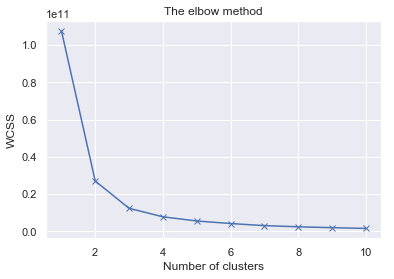

In [122]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_customers)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [123]:
kmeans = KMeans(n_clusters=3).fit(df_customers)
centroids = kmeans.cluster_centers_
df_customers['label'] = kmeans.fit_predict(df_customers)

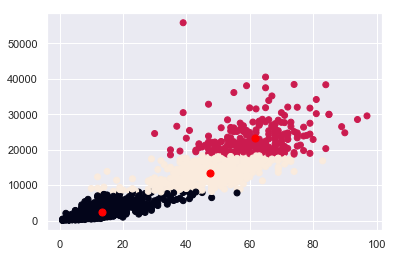

In [124]:
plt.scatter(df_customers.Date, df_customers.Sales_ohne_Discount, c= df_customers['label'])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a34db0b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a34db0080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a34db0b00>],
 'medians': [<matplotlib.lines.Line2D at 0x1a34dafa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a34daf518>],
 'means': []}

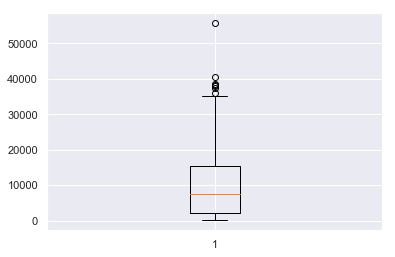

In [125]:
plt.boxplot(df_customers.Sales_ohne_Discount)

In [126]:
df_customers[df_customers.Sales_ohne_Discount>50000]

,Date,Sales_ohne_Discount,label
Customer_ID,,,
SM-20320,39,55805.59,1


In [127]:
df[df.Sales_ohne_Discount>40000]

,Date,Customer_ID,Customer_Name,Segment,City,Country,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping Cost,Sales_ohne_Discount
28612,18-03-2011,SM-20320,Sean Miller,Home Office,Jacksonville,United States,US,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784,24.29,45276.96


In [128]:
df=df[df.Sales_ohne_Discount<40000]

In [129]:
df_customers=df.groupby('Customer_ID').agg({'Date':'count','Sales_ohne_Discount':'sum'})

In [130]:
df.to_csv('../csv/cleaned_csv.csv', sep=",", index=False)